In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# HEART DISEASE EDA

The goal of this notebook is to perform some Exploritory analysis on heart disease data in order to
create a pipeline best suited to modeling and predicting heart disease

In [2]:
from pandas import DataFrame
def load_data(path: Path)->DataFrame:
    return pd.read_csv(path)

data_set = load_data(Path("Data/heart.csv"))
data_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data_set = data_set[data_set["ca"] < 4]
data_set = data_set[data_set["thal"] > 0]
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_set = data_set.rename(columns={'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
                                    'chol': 'cholesterol','fbs': 'fasting_blood_sugar',
                                    'restecg' : 'rest_electrocardiographic', 'thalach': 'max_heart_rate_achieved',
                                    'exang': 'exercise_induced_angina','oldpeak': 'st_depression',
                                    'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")

In [5]:
data_set.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'rest_electrocardiographic', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

<AxesSubplot:xlabel='target', ylabel='count'>

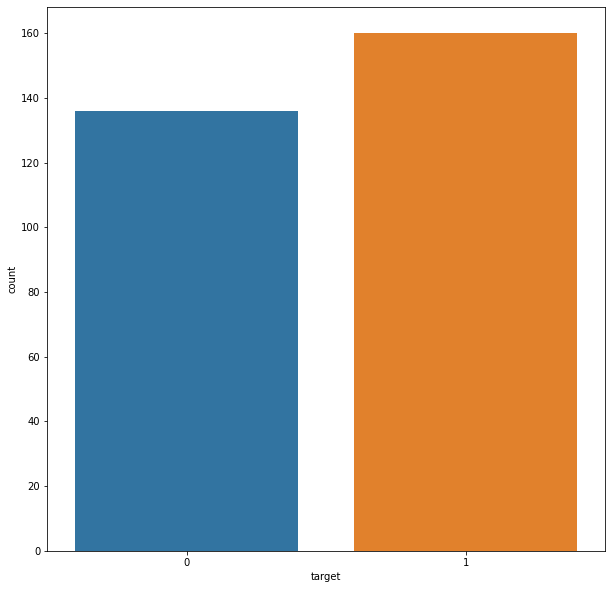

In [7]:
# target value distribution
fig , ax = plt.subplots(figsize=(10, 10))
sns.countplot(x=data_set["target"], ax = ax)

### Numerical Features distributions
We would like to investigate the distribution the numerical features have

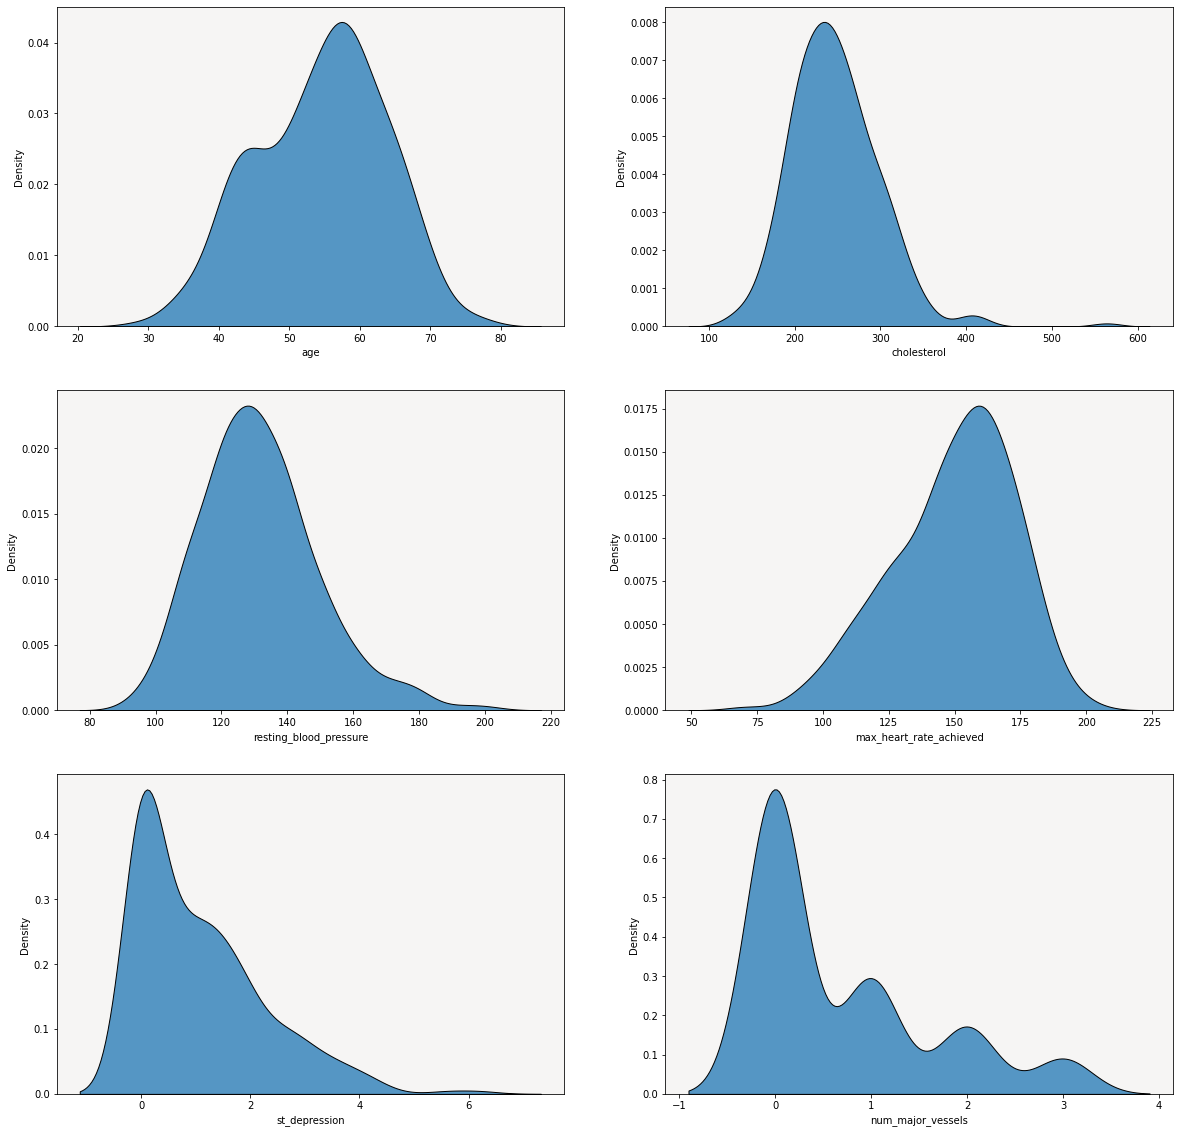

In [48]:
from typing import List
def plot_numerical_feature_distributions(df: DataFrame, numerical_features: List[str])->None:
    df = df[ numerical_features + ["target"]]
    l = len(numerical_features)
    n_col = 2
    n_row = int(np.ceil(l/n_col))
    fig_, ax_ = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20, 20))

    for i, col  in enumerate(numerical_features, 1):
        plt.subplot(n_row, n_col, i, facecolor='#F6F5F4')
        ax_ = sns.kdeplot(df[col], x=col, multiple="stack")

plot_numerical_feature_distributions(data_set, numerical_features=num_feats)


In [51]:
def numerical_features_pairplot(df):
    ax_ = sns.pairplot(df, hue="target", corner= True, diag_kind="hist")

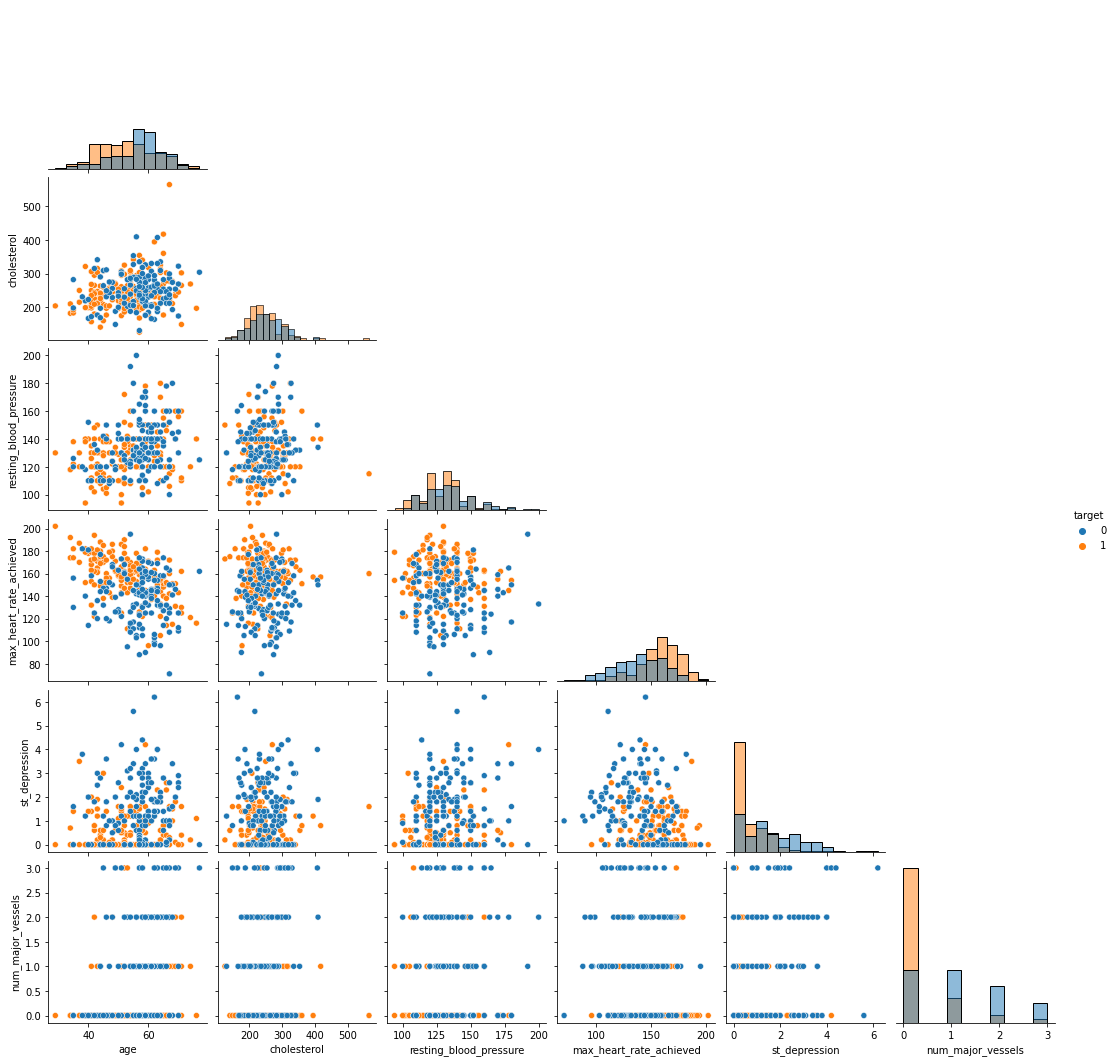

In [52]:
numerical_features_pairplot(df=data_set[num_feats + ["target"]])

## Correlation Heatmaps

In this section we would like to estimate two correlations.<br>
The features with the highest correlation coefficient will be our prime pedictors
   1) Peasons Correlation
   2) Biserial Correlation

In [80]:
from scipy import stats
def point_biserial_correlation(df: DataFrame, features: List[str]):
    print(len(features))
    point_biserial = lambda x, y : stats.pointbiserialr(x, y)[0]
    _corr = [[point_biserial(df[i] , df[j]) for i in features] for j in features]

    return pd.DataFrame(_corr, columns=features, index=features)

def plot_correlation_matrix(correlation_df : DataFrame, title: str = "Correlation Matrix"):
    print(correlation_df.shape)
    mask = np.triu(np.ones_like(correlation_df, dtype=bool))
    correlation_df = correlation_df.mask(mask)
    f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
    sns.heatmap(correlation_df, mask=mask, vmax=1.0, vmin=-1, center=0, annot=True,square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
    ax.set_title(f"Correlation Plot {title}")
    plt.plot()




7
(7, 7)
(7, 7)


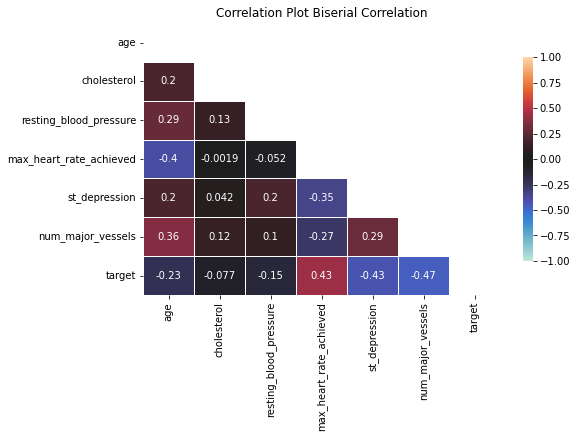

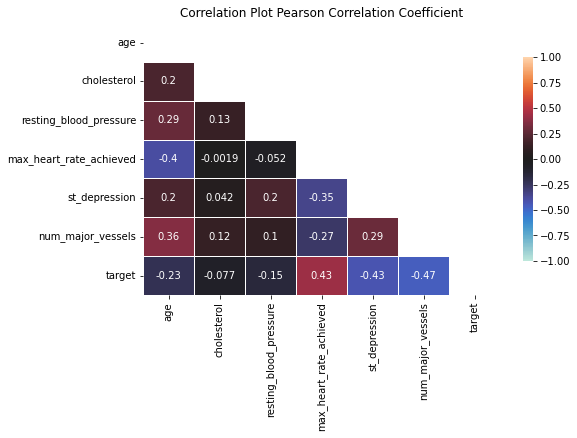

In [83]:
point_correlation = point_biserial_correlation(df=data_set, features=num_feats + ["target"])
plot_correlation_matrix(correlation_df=data_set[num_feats + ["target"]].corr(method="pearson"), title="Biserial Correlation")
plot_correlation_matrix(point_correlation, title="Pearson Correlation Coefficient")

### Conclusions
The main findings of the EDA is that various featured do not exhibit the intended distribution and will have to be<br>
scaled and Tranformed<br>
These features are
   - Cholestoral
   - Resting Blood Pressure
   - Max Heartrate Achieved
   - St depression
   - Num major blood Vessils

Another clue we can gather from the eda is the features that would be most helpfull in creating <br>
a suitable model. These features showed a high correlation with the target variable<br>
These features include
   - _max heart rate_
   - _Depression_
   - _num major vessils_

Weak but suitable features for engineering are
   - _age_
   - _resting blood pressure_